In [21]:
import fipy as fi
from __future__ import division
%matplotlib inline

In [2]:
nx = 50
dx = 1.
mesh = fi.Grid1D(nx=nx, dx=dx)

In [3]:
phi = fi.CellVariable(name = 'solution variable', mesh=mesh,value=0.)

In [4]:
D=1

In [5]:
valueLeft = 1
valueRight = 0

In [6]:
phi.constrain(valueRight, mesh.facesRight)
phi.constrain(valueLeft, mesh.facesLeft)

In [7]:
eqX = fi.TransientTerm() == fi.ExplicitDiffusionTerm(coeff=D)

In [8]:
timeStepDuration = 0.9 * dx**2 / (2 * D)
steps = 100

In [9]:
phiAnalytical = fi.CellVariable(name = 'analytical value', mesh=mesh)

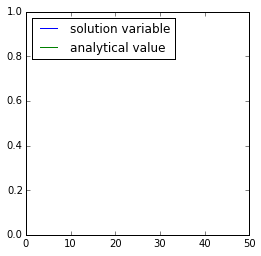

In [10]:
viewer = fi.Viewer(vars = (phi, phiAnalytical),datamin=0., datamax=1.)


In [11]:
x = mesh.cellCenters[0]
t = timeStepDuration * steps


In [18]:
try:
    from scipy.special import erf 
    phiAnalytical.setValue(1 - erf(x / (2 * fi.numerix.sqrt(D * t)))) 
except ImportError:
    print "The SciPy library is not available to test the solution to \
    the transient diffusion equation"

In [19]:
for step in range(steps):
    eqX.solve(var=phi, dt=timeStepDuration)
    

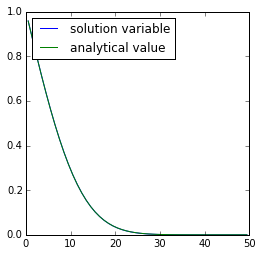

In [24]:
viewer